In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras import models
from keras.preprocessing import image

In [2]:
# uploaded in dropbox and using it
!wget https://www.dropbox.com/s/xmopr2altgp8f0a/dataset.zip?dl=0 -O dataset.zip

--2020-08-14 04:05:17--  https://www.dropbox.com/s/xmopr2altgp8f0a/dataset.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.82.1, 2620:100:6032:1::a27d:5201
Connecting to www.dropbox.com (www.dropbox.com)|162.125.82.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/xmopr2altgp8f0a/dataset.zip [following]
--2020-08-14 04:05:18--  https://www.dropbox.com/s/raw/xmopr2altgp8f0a/dataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc1a4c5c92edbcdaee26e1ac069f.dl.dropboxusercontent.com/cd/0/inline/A9YwEOVElb2XLADj9e3xf5_chmz4ClMkDj4b2FNVhfkhnKcS0k6Jlqbc_q5z1Q33vS4rsZRHrHiBcNzk70TqcpMrnY1Tugekhix2aYbWeKCIauoMb0XOmdTm2dTMrDznFIo/file# [following]
--2020-08-14 04:05:18--  https://uc1a4c5c92edbcdaee26e1ac069f.dl.dropboxusercontent.com/cd/0/inline/A9YwEOVElb2XLADj9e3xf5_chmz4ClMkDj4b2FNVhfkhnKcS0k6Jlqbc_q5z1Q33vS4rsZRHrHiBcNzk70TqcpMrnY1Tugekhix2aYbWeKCIa

In [3]:
!unzip dataset

Archive:  dataset.zip
   creating: Test/images/
  inflating: Test/images/test_0.jpg  
  inflating: Test/images/test_1.jpg  
  inflating: Test/images/test_10.jpg  
  inflating: Test/images/test_100.jpg  
  inflating: Test/images/test_101.jpg  
  inflating: Test/images/test_102.jpg  
  inflating: Test/images/test_103.jpg  
  inflating: Test/images/test_104.jpg  
  inflating: Test/images/test_105.jpg  
  inflating: Test/images/test_106.jpg  
  inflating: Test/images/test_107.jpg  
  inflating: Test/images/test_108.jpg  
  inflating: Test/images/test_109.jpg  
  inflating: Test/images/test_11.jpg  
  inflating: Test/images/test_110.jpg  
  inflating: Test/images/test_111.jpg  
  inflating: Test/images/test_112.jpg  
  inflating: Test/images/test_113.jpg  
  inflating: Test/images/test_114.jpg  
  inflating: Test/images/test_115.jpg  
  inflating: Test/images/test_116.jpg  
  inflating: Test/images/test_117.jpg  
  inflating: Test/images/test_118.jpg  
  inflating: Test/images/test_119.jpg 

In [4]:
import os,shutil

In [5]:
folders=os.listdir("Train")
print((folders))

['Bulbasaur', 'Aerodactyl', 'Squirtle', 'Fearow', 'Dratini', 'Psyduck', 'Meowth', 'Charmander', 'Spearow', 'Pikachu']


In [6]:
# this is to make Val folder in directory
if not os.path.isdir("Val"):
  os.mkdir("Val")
!ls

dataset.zip  sample_data  Test	Train  Val


In [7]:
# this to make sub folder in Val folder
for c in folders:
  p=os.path.join("Val",c)
  if not os.path.isdir(p):
    os.mkdir(p)

In [8]:
print("for training data:- ")
for f in folders:
  path="Train/"+f
  print(f+ " "+ str(len(os.listdir(path))))

for training data:- 
Bulbasaur 255
Aerodactyl 80
Squirtle 248
Fearow 111
Dratini 98
Psyduck 143
Meowth 63
Charmander 264
Spearow 117
Pikachu 268


In [9]:
# this is to move 10% image from train to val folder
# this is to run once if storage contain images in val then do not run this again as it will decrease the data from train data
Split=0.9

for f in os.listdir("Train"):
  path = "Train/"+f
  # this can also be used  path=os.path.join("Train",f)
  imgs=os.listdir(path)
  split_size= int(Split*len(imgs))
  file_to_move=imgs[split_size:]
  #print(len(file_to_move))
  #print(file_to_move)

  for img_f in file_to_move:
    src=os.path.join(path,img_f)
    dest=os.path.join("Val/"+f,img_f)
    #print(src)
    #print(dest)
    shutil.move(src,dest)

In [10]:
print("for training data:- ")
for f in folders:
  path="Train/"+f
  print(f+ " "+ str(len(os.listdir(path))))
print("")
print("for vaidation data:- ")
for f in folders:
  path="Val/"+f
  print(f+ " "+ str(len(os.listdir(path))))

for training data:- 
Bulbasaur 229
Aerodactyl 72
Squirtle 223
Fearow 99
Dratini 88
Psyduck 128
Meowth 56
Charmander 237
Spearow 105
Pikachu 241

for vaidation data:- 
Bulbasaur 26
Aerodactyl 8
Squirtle 25
Fearow 12
Dratini 10
Psyduck 15
Meowth 7
Charmander 27
Spearow 12
Pikachu 27


In [12]:
from keras.preprocessing.image import ImageDataGenerator

train_gen=ImageDataGenerator(rescale=1.0/255,
                             shear_range=0.2,
                             zoom_range=0.2,
                             )
val_gen=ImageDataGenerator(rescale=1.0/255)

train_generator=train_gen.flow_from_directory(
    "Train/",
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_gen.flow_from_directory(
    "Val/",
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical'
)

Found 1473 images belonging to 10 classes.
Found 169 images belonging to 10 classes.


In [13]:
for x,y in train_generator:
  print(x.shape)
  print(y.shape)
  break

(32, 224, 224, 3)
(32, 10)


In [14]:
train_generator.class_indices

{'Aerodactyl': 0,
 'Bulbasaur': 1,
 'Charmander': 2,
 'Dratini': 3,
 'Fearow': 4,
 'Meowth': 5,
 'Pikachu': 6,
 'Psyduck': 7,
 'Spearow': 8,
 'Squirtle': 9}

In [15]:
val_generator.class_indices

{'Aerodactyl': 0,
 'Bulbasaur': 1,
 'Charmander': 2,
 'Dratini': 3,
 'Fearow': 4,
 'Meowth': 5,
 'Pikachu': 6,
 'Psyduck': 7,
 'Spearow': 8,
 'Squirtle': 9}

In [16]:
#Building our model
model = models.Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(224,224,3)))
model.add(MaxPool2D(2,2))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 128)       7

In [18]:
model.compile(loss=keras.losses.categorical_crossentropy,optimizer='adam',metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 128)       7

In [20]:
hist = model.fit_generator(
    train_generator,
    steps_per_epoch=47,
    epochs=20,
    validation_data=val_generator,
    validation_steps=6
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
14/47 [=======>......................] - ETA: 1:47 - loss: 1.9628 - accuracy: 0.3661

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


47/47 [==============================] - 155s 3s/step - loss: 1.4658 - accuracy: 0.5397 - val_loss: 2.1676 - val_accuracy: 0.4083
Epoch 2/20
47/47 [==============================] - 150s 3s/step - loss: 0.9328 - accuracy: 0.6965 - val_loss: 2.1000 - val_accuracy: 0.5385
Epoch 3/20
47/47 [==============================] - 150s 3s/step - loss: 0.7435 - accuracy: 0.7671 - val_loss: 1.9639 - val_accuracy: 0.4556
Epoch 4/20
47/47 [==============================] - 150s 3s/step - loss: 0.5579 - accuracy: 0.8052 - val_loss: 1.8084 - val_accuracy: 0.7219
Epoch 5/20
47/47 [==============================] - 154s 3s/step - loss: 0.5288 - accuracy: 0.8316 - val_loss: 1.6470 - val_accuracy: 0.7456
Epoch 6/20
47/47 [==============================] - 150s 3s/step - loss: 0.4057 - accuracy: 0.8663 - val_loss: 1.2883 - val_accuracy: 0.6746
Epoch 7/20
47/47 [==============================] - 150s 3s/step - loss: 0.3752 - accuracy: 0.8792 - val_loss: 1.3098 - val_accuracy: 0.7101
Epoch 8/20
47/47 [======

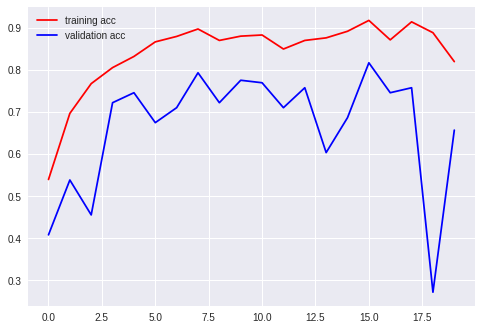

In [21]:
plt.style.use("seaborn")

plt.plot(hist.history['accuracy'],label="training acc",c='red')
plt.plot(hist.history['val_accuracy'],label="validation acc",c='blue')
plt.legend()
plt.show()

In [22]:
path="Test/"
y_df=pd.read_csv(path+"sample_submission.csv")
y_df.shape

(187, 2)

In [23]:
y_df.head(7)

,Name,Class
0,test_32.jpg,0
1,test_147.jpg,0
2,test_171.jpg,0
3,test_114.jpg,0
4,test_162.jpg,0
5,test_68.jpg,0
6,test_117.jpg,0


In [24]:
y_df.drop(['Class'],inplace=True,axis=1)

In [25]:
y_df.head(7)

,Name
0,test_32.jpg
1,test_147.jpg
2,test_171.jpg
3,test_114.jpg
4,test_162.jpg
5,test_68.jpg
6,test_117.jpg


In [26]:
y_df=y_df.values.reshape((-1,))
print(y_df.shape)

(187,)


In [27]:
from pathlib import Path
pi_test=Path("Test/images/")

image_data_test=[]
label_test=[]

for image_path in pi_test.glob("*"):
  #label=(str(image_path).split("\\")[-1]) this is not woring in goole colab
  label=(str(image_path).split("/")[-1])

  img=image.load_img(image_path,target_size=(224,224,3))
  image_array=image.img_to_array(img)/255.0
  image_data_test.append(image_array)
  label_test.append(label)

In [28]:
image_data_test=np.array(image_data_test)

In [29]:
print(label_test[:5])
print("\n\n")
print(label_test[0])

['test_123.jpg', 'test_132.jpg', 'test_148.jpg', 'test_171.jpg', 'test_82.jpg']



test_123.jpg


In [30]:
print(image_data_test.shape)
print(len(label_test))

(187, 224, 224, 3)
187


In [31]:
y_predicted=model.predict_classes(image_data_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [32]:
y_predicted

array([6, 7, 7, 9, 2, 7, 9, 0, 6, 1, 7, 5, 2, 2, 7, 6, 7, 7, 1, 0, 9, 2,
       6, 7, 2, 7, 9, 1, 6, 6, 0, 6, 8, 1, 1, 2, 9, 9, 3, 2, 7, 1, 7, 2,
       2, 8, 6, 6, 2, 7, 4, 7, 6, 8, 2, 9, 1, 8, 2, 6, 3, 3, 6, 9, 7, 7,
       9, 2, 7, 9, 2, 0, 7, 1, 9, 4, 7, 9, 9, 2, 2, 2, 7, 7, 7, 2, 2, 6,
       4, 2, 0, 6, 1, 9, 2, 2, 1, 2, 6, 2, 9, 2, 2, 9, 7, 7, 9, 9, 4, 2,
       6, 2, 4, 6, 9, 5, 7, 2, 2, 8, 9, 2, 7, 1, 9, 2, 6, 2, 6, 6, 2, 1,
       9, 6, 6, 7, 9, 7, 2, 2, 7, 8, 1, 8, 2, 2, 4, 2, 4, 8, 7, 9, 6, 7,
       9, 9, 4, 7, 6, 0, 9, 4, 7, 6, 1, 7, 3, 9, 2, 9, 2, 2, 9, 3, 7, 2,
       9, 1, 2, 0, 2, 3, 1, 0, 0, 1, 6])

In [33]:
y_pre=[]
for i in range(image_data_test.shape[0]):
  index=label_test.index(y_df[i])
  y=y_predicted[index]
  y_pre.append((y_df[i],y))

In [34]:
y_pre=np.array(y_pre)

In [35]:
y_pre

array([['test_32.jpg', '1'],
       ['test_147.jpg', '8'],
       ['test_171.jpg', '9'],
       ['test_114.jpg', '6'],
       ['test_162.jpg', '1'],
       ['test_68.jpg', '2'],
       ['test_117.jpg', '7'],
       ['test_106.jpg', '7'],
       ['test_160.jpg', '9'],
       ['test_108.jpg', '9'],
       ['test_13.jpg', '9'],
       ['test_165.jpg', '2'],
       ['test_75.jpg', '3'],
       ['test_137.jpg', '7'],
       ['test_126.jpg', '6'],
       ['test_84.jpg', '4'],
       ['test_42.jpg', '2'],
       ['test_153.jpg', '8'],
       ['test_151.jpg', '2'],
       ['test_125.jpg', '2'],
       ['test_63.jpg', '2'],
       ['test_172.jpg', '9'],
       ['test_185.jpg', '1'],
       ['test_144.jpg', '7'],
       ['test_29.jpg', '1'],
       ['test_5.jpg', '0'],
       ['test_1.jpg', '0'],
       ['test_138.jpg', '7'],
       ['test_65.jpg', '2'],
       ['test_135.jpg', '6'],
       ['test_152.jpg', '7'],
       ['test_127.jpg', '7'],
       ['test_164.jpg', '2'],
       ['test_157.jpg',

In [36]:
df_pre=pd.DataFrame(data=y_pre,columns=['Name','Class'])

In [37]:
df_pre.to_csv('y_predict_of_pokedex_learning_own_features1.csv',index=False)

In [38]:
from google.colab import files
files.download("y_predict_of_pokedex_learning_own_features1.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>